# Customer Insights for an Ecommerce Company

goal:to understand how Principal Component Analysis (PCA) can be 
used to reduce the number of dimensions in high-dimensional datasets while retaining critica 
information. You will apply PCA to a customer behavior dataset and analyze how featu e
reduction impacts data visualization and decision-making.

**Scenario:**
An e-commerce company collects extensive data on customer interactions, including browsing 
history, purchase frequency, total spending, and product categories viewed. With hundreds o 
features, analyzing this data directly is comple
x.
The company wants to apply PCA to reduce the dataset’s dimensionality while retain ng
essential patterns. This will help in customer segmentation, trend analysis, and targ ted
marketing strate
gies.
Your task is to use PCA to reduce the number of features in a customer dataset and vis alize
the effect of dimensionality reduction.

The dataset contains the following customer behavior attributes:

• Customer ID – Unique identifier for each custome
r
• Total Spending – Amount spent by the customer in the last ye
ar
• Visits Per Month – Number of times the customer visits the website mont
hly
• Avg. Cart Size – Average number of items per transac
tion
• Product Categories Viewed – Number of different categories a customer exp
lores
• Customer Age – Age of the cu


stomer
You will apply PCA to reduce this dataset from 5 features to 2 principal compone ts and
analyze how much information is retained.

# Task 1: Data Preprocessing
- load dataset
- handle missing values and normalize dataset
- standardize the features before applying PCA

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Generate synthetic dataset
num_customers = 200

data = {
    "Customer ID": np.arange(1, num_customers + 1),
    "Total Spending": np.random.uniform(100, 5000, num_customers),  # Spending in dollars
    "Visits Per Month": np.random.randint(1, 30, num_customers),  # Visits per month
    "Avg. Cart Size": np.random.uniform(1, 10, num_customers),  # Items per transaction
    "Product Categories Viewed": np.random.randint(1, 20, num_customers),  # Categories explored
    "Customer Age": np.random.randint(18, 75, num_customers),  # Age in years
}

df = pd.DataFrame(data)
df.head()

,Customer ID,Total Spending,Visits Per Month,Avg. Cart Size,Product Categories Viewed,Customer Age
0,1,1935.246582,24,4.854830,5,32
1,2,4758.500101,20,7.196499,1,28
2,3,3686.770315,11,1.523742,1,25
3,4,3033.426573,17,9.236924,18,43
4,5,864.491338,8,4.981170,15,68


In [6]:
#handle missing values and normalize
df.isnull().any()

#normalize using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(df[["Total Spending" , "Visits Per Month", "Avg. Cart Size", "Product Categories Viewed", "Customer Age"]])


In [8]:
#Standardize
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(normalized_data)

feature_columns = ["Total Spending", "Visits Per Month", "Avg. Cart Size", 
                   "Product Categories Viewed", "Customer Age"]

# Convert to DataFrame for readability
df_standardized = pd.DataFrame(standardized_data, columns=feature_columns)
df_standardized.head()

,Total Spending,Visits Per Month,Avg. Cart Size,Product Categories Viewed,Customer Age
0,-0.372140,0.957069,-0.268379,-0.850763,-0.774565
1,1.586615,0.499961,0.638848,-1.542440,-1.021733
2,0.843056,-0.528530,-1.558935,-1.542440,-1.207110
3,0.389770,0.157131,1.429366,1.397188,-0.094851
4,-1.115023,-0.871361,-0.219432,0.878430,1.449953


# Task 2: Apply PCA
- compute Principal component and reduce the dataset to 2 dimensions
- analyze how much variance is retained

In [9]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_data)

# Convert to DataFrame
df_pca = pd.DataFrame(principal_components, columns=["PC1", "PC2"])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance)
print("Total Variance Retained:", sum(explained_variance))
df_pca.head()

Explained Variance Ratio: [0.24412955 0.21931812]
Total Variance Retained: 0.46344767378891616


,PC1,PC2
0,0.642612,-0.772499
1,2.105937,-1.220413
2,2.411193,0.704209
3,-0.819029,-0.621569
4,-1.791794,1.022298


# Task 3 : Visualization and Interpretation
- scatter plot the first two principal components
- explain how well pca preserved the datas structure
- provide insights on hwo this informaiton can improve decision making

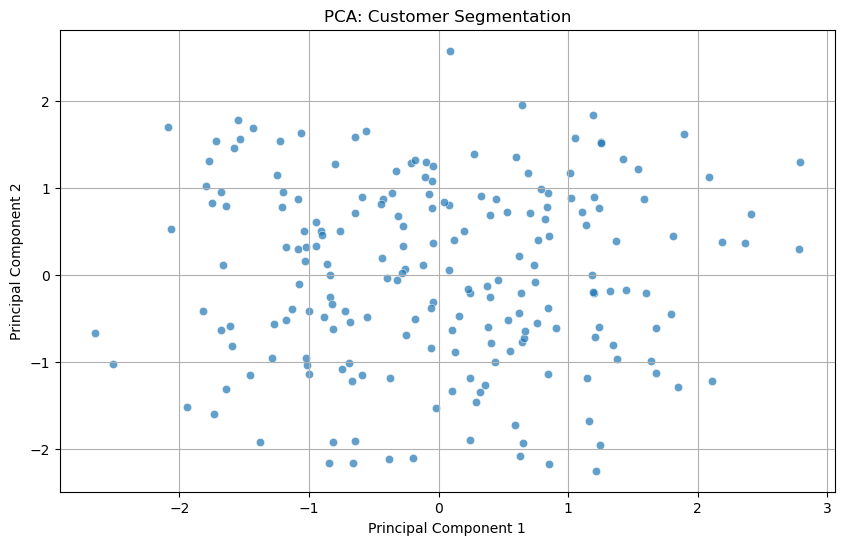

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Customer Segmentation")
plt.grid(True)
plt.show()


Did PCA preserve structure?

If points form clusters, then PCA has effectively preserved relationships in the data.
If points are randomly scattered, then PCA may have lost important structure.

Business Insights from PCA:

Customer Segmentation: If clusters appear, businesses can group customers based on behavior and target marketing efforts accordingly.
Anomaly Detection: Outliers in the scatter plot could indicate unusual spending patterns or high-value customers.
Feature Reduction for Simpler Models: Since PCA retains most of the data’s information in fewer dimensions, businesses can use just these two principal components instead of all features for faster, more efficient analytics.

**Discussion Questions**
1. How much variance is retained after applying PCA?
2. How does reducing dimensionality help with customer segmentation?
3. What challenges might arise when using PCA for real-world datasets?

1. How much variance is retained after applying PCA?
The explained variance ratio tells us how much information the two principal components retain.
If the sum of the first two components' variance ratios is above 80-90%, PCA has effectively captured most of the dataset’s structure. Here thevalue is 0.46344767378891616 , meaning we lost most of the structure

2. How does reducing dimensionality help with customer segmentation?

Easier visualization: Customers are represented in just two dimensions, making it easier to spot groups and patterns.

Improves clustering algorithms: Reducing unnecessary features helps K-Means or Hierarchical Clustering work more efficiently.

Removes noise: PCA filters out weak or correlated features, making segmentation more reliable.

Faster processing: Lower dimensions mean fewer computations, which improves performance in machine learning models.


3. What challenges might arise when using PCA for real-world datasets?

Loss of Interpretability: PCA creates new features (PC1, PC2) that are linear combinations of original features, making it
harder to explain the results.

Need for Standardization: PCA is sensitive to different feature scales, so all variables must be standardized first.

Doesn’t Work Well for Non-Linear Data: If customer behavior isn’t linearly separable, PCA may fail to find meaningful patterns.

Choosing the Right Number of Components: Keeping too few components may lose important information, while keeping too many defeats the purpose of dimensionality reduction.